<a href="https://colab.research.google.com/github/morgantudor/Project-4-TrafficSign/blob/main/Project4_TrafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score


In [2]:
#Load Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Define file paths - some to be used later on
train_file_path = '/content/drive/My Drive/TrafficSign_Data/data/Train'
#validation_file_path = '/content/drive/My Drive/TrafficSign_Data/data/valid'
#test_file_path = '/content/drive/My Drive/TrafficSign_Data/data/test'

In [4]:
#create lists to store information
data = []
labels = []
CLASSES = 43

# using for loop to access each image in the training folder
for i in range(CLASSES):
    img_path = os.path.join(train_file_path, str(i))
    for img in os.listdir(img_path):
        im = Image.open(os.path.join(train_file_path, str(i), img))
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)

#format the data as an array
data = np.array(data)
labels = np.array(labels)

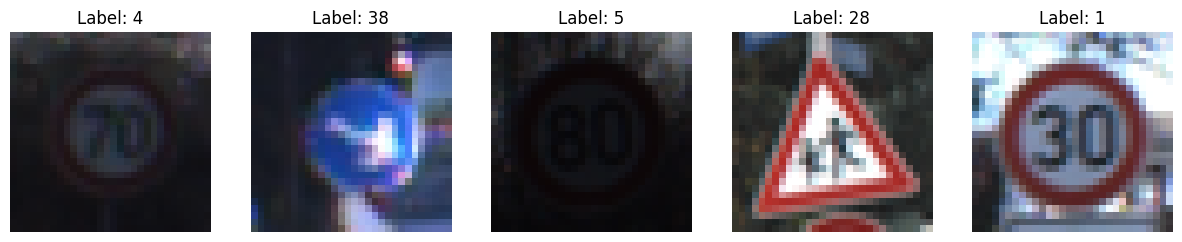

In [5]:
#displaying 5 random images to show what we are working with (credit: chat gpt)
import random

# Get 5 random indices
random_indices = random.sample(range(len(data)), 5)

# Plot the images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data[idx])
    plt.title(f"Label: {labels[idx]}")
    plt.axis('off')
plt.show()

In [6]:
#split data into different sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# convert integer label to one-hot data (binary for reading) through our complete list of classes
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:
#build the model
model = Sequential()

#layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))

#layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

#layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))

#layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

#flatten
model.add(Flatten())

#layer
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))

#softmax output - best for multi-class image outputs to help it converge efficiently
model.add(Dense(43, activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [8]:
#compile model - categorical crossentropy better to use with softmax apparently
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
#fit the model and run a batch size because the data is so big - compare it with the validation data
#the validation data helps us to know when the data might be overfit - if it's accuracy goes down but the validation data is high, we know there is something going on
fit_model = model.fit(x_train, y_train, epochs=25, batch_size=75, validation_data=(x_test, y_test))

Epoch 1/25
419/419 [==============================] - 68s 158ms/step - loss: 2.4927 - accuracy: 0.3624 - val_loss: 1.1208 - val_accuracy: 0.7222
Epoch 2/25
419/419 [==============================] - 66s 157ms/step - loss: 1.1794 - accuracy: 0.6532 - val_loss: 0.4405 - val_accuracy: 0.8886
Epoch 3/25
419/419 [==============================] - 66s 159ms/step - loss: 0.6398 - accuracy: 0.8093 - val_loss: 0.2380 - val_accuracy: 0.9375
Epoch 4/25
419/419 [==============================] - 66s 157ms/step - loss: 0.4530 - accuracy: 0.8670 - val_loss: 0.1467 - val_accuracy: 0.9663
Epoch 5/25
419/419 [==============================] - 70s 167ms/step - loss: 0.3413 - accuracy: 0.8993 - val_loss: 0.1400 - val_accuracy: 0.9633
Epoch 6/25
419/419 [==============================] - 67s 159ms/step - loss: 0.2886 - accuracy: 0.9145 - val_loss: 0.1087 - val_accuracy: 0.9728
Epoch 7/25
419/419 [==============================] - 66s 158ms/step - loss: 0.2548 - accuracy: 0.9243 - val_loss: 0.0630 - val_ac

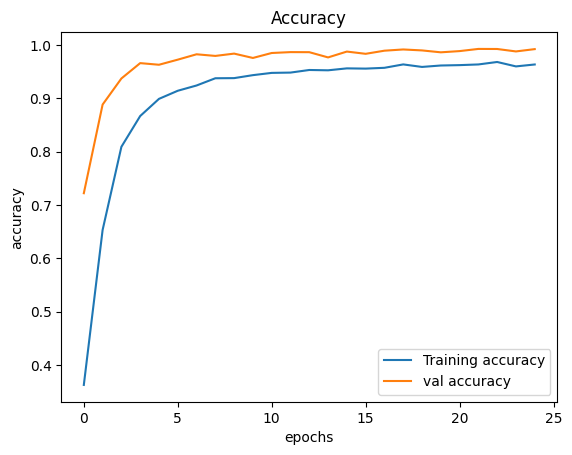

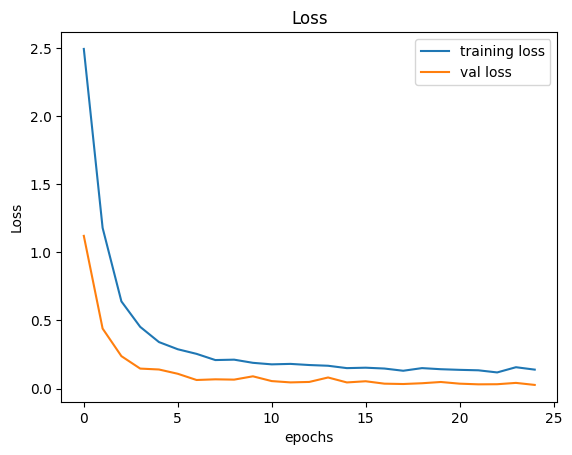

In [10]:
#AccuracyPlot
plt.figure(0)
plt.plot(fit_model.history['accuracy'], label="Training accuracy")
plt.plot(fit_model.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

#LossPlot
plt.figure(1)
plt.plot(fit_model.history['loss'], label="training loss")
plt.plot(fit_model.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [35]:
#test and evaluate the model
test_file_path = '/content/drive/My Drive/TrafficSign_Data/data/'
Y_test = pd.read_csv(test_file_path + 'Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

from keras.preprocessing.image import load_img

output = list()
for img in test_images:
    image = load_img(os.path.join(test_file_path, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred = model.predict(X_test)
pred=np.argmax(pred, axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 8s 20ms/step
Test Data accuracy:  94.60807600950119


246/246 [==============================] - 6s 23ms/step


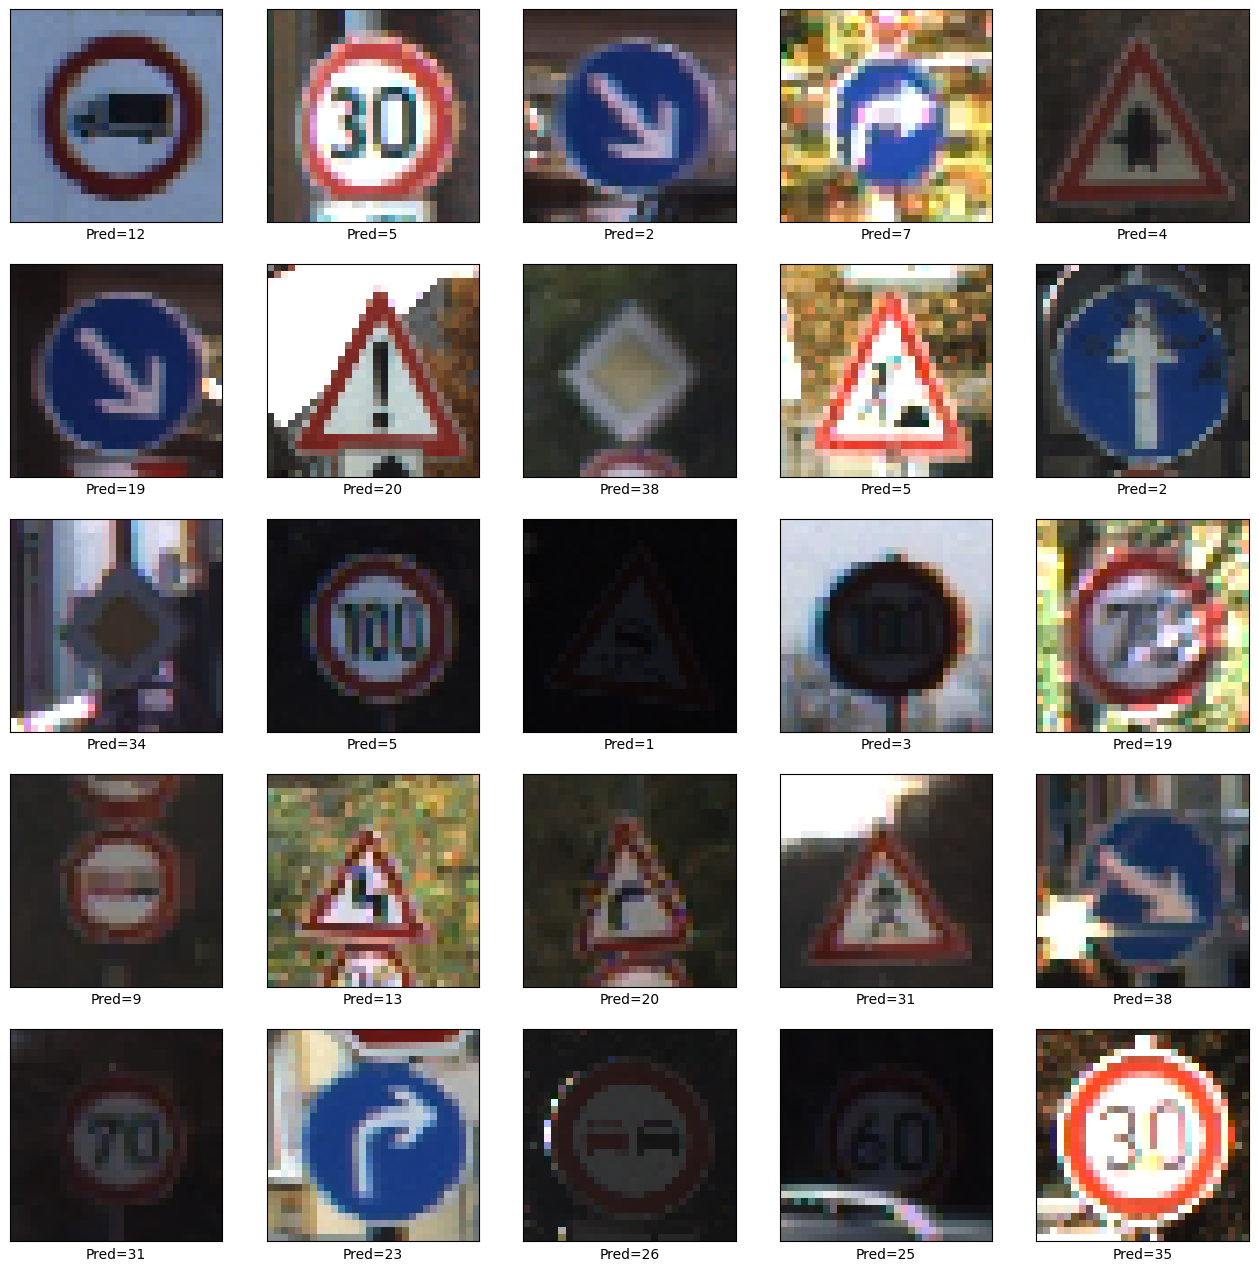

In [40]:
#visualizing the predictions (credit: chat gpt for half)
plt.figure(figsize=(16, 16))
pred = model.predict(x_test)

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = np.argmax(pred[start_index + i])
    plt.xlabel('Pred={}'.format(prediction))
    plt.imshow(X_test[start_index + i], cmap=plt.cm.binary)
plt.show()